In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls
!pwd
!cd /content/drive
print('done')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
drive  sample_data
/content
done


In [0]:
!ls "/content/drive/My Drive/SML" #/Attribute/small_data_attri"
!cd "/content/drive/My Drive/SML"
!pwd
# !cd "/content/drive/My Drive/CF/small_data"

jigsaw-toxic-comment-classification-challenge.zip  test.csv
preprocessed_data.csv				   test_labels.csv
sample_submission.csv				   train.csv
/content


In [0]:
%%capture 

for i in range(10):
    print(i)

In [0]:
# %%capture

# !unzip /content/drive/'My Drive'/SML/jigsaw-toxic-comment-classification-challenge.zip -d /content/drive/'My Drive'/SML

In [0]:
import pandas as pandas 
import numpy as numpy
import seaborn as sb
import matplotlib.pyplot as plt

In [0]:
data = pandas.read_csv('/content/drive/My Drive/SML/train.csv', sep = ',')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [0]:
data1 = data.drop(['id'], axis=1)
data1.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


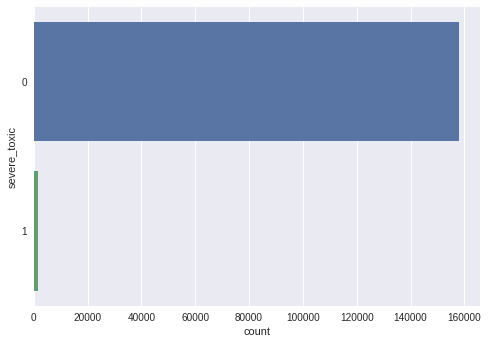

In [0]:
sb.countplot(data = data1, y='severe_toxic')
plt.show()

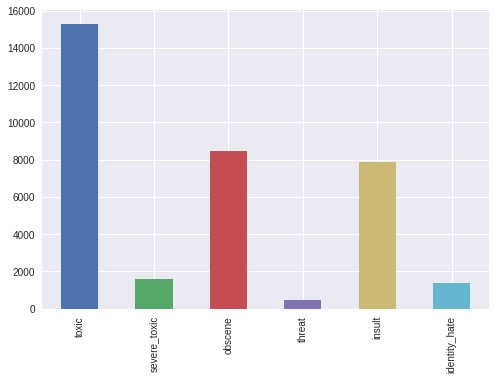

In [0]:
df_value = data1.sum(numeric_only=True)
# print(df_value)
# plot sum`
df_value.plot.bar()

In [0]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
import re

stop = stopwords.words('english')

In [0]:
print(data1['comment_text'])

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
5         "\n\nCongratulations from me as well, use the ...
6              COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
7         Your vandalism to the Matt Shirvington article...
8         Sorry if the word 'nonsense' was offensive to ...
9         alignment on this subject and which are contra...
10        "\nFair use rationale for Image:Wonju.jpg\n\nT...
11        bbq \n\nbe a man and lets discuss it-maybe ove...
12        Hey... what is it..\n@ | talk .\nWhat is it......
13        Before you start throwing accusations and warn...
14        Oh, and the girl above started her arguments w...
15        "\n\nJuelz Santanas Age\n\nIn 2002, Juelz Sant...
16        Bye! \n\nDon't look, come or t

In [0]:
def remove_stopWords(s):
    s = ' '.join(word for word in s.split() if word not in stop)
    return s

def preprocess(words):
    
    ##words = words.apply(lambda x: x.decode('utf-8').strip())
    #words = words.apply(lambda x: x.lower())
    words = words.apply(lambda x : x.lower())
    # to remove number and puncuation
    words = words.apply(lambda x : " ".join(re.findall('[\w]+',x)))
    # to remove stop words
    words = words.apply(lambda x: remove_stopWords(x))
    # to keep only alphabet string
#     words = words.apply(lambda x : " ".join(re.findall('[^a-zA-Z]',x)))
    return words

In [0]:
data1['comment_text'] = preprocess(data1['comment_text'])
print(data1['comment_text'])

0         explanation edits made username hardcore metal...
1         aww matches background colour seemingly stuck ...
2         hey man really trying edit war guy constantly ...
3         make real suggestions improvement wondered sec...
4                             sir hero chance remember page
5                  congratulations well use tools well talk
6                               cocksucker piss around work
7         vandalism matt shirvington article reverted pl...
8         sorry word nonsense offensive anyway intending...
9                      alignment subject contrary dulithgow
10        fair use rationale image wonju jpg thanks uplo...
11                         bbq man lets discuss maybe phone
12        hey talk exclusive group wp talibans good dest...
13        start throwing accusations warnings lets revie...
14        oh girl started arguments stuck nose belong be...
15        juelz santanas age 2002 juelz santana 18 years...
16                  bye look come think 

In [0]:
# my_df = pd.DataFrame(data1['comment_text'])
data1.to_csv('/content/drive/My Drive/SML/preprocessed_data.csv')#, index=False, header=comment_text)
data1.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,aww matches background colour seemingly stuck ...,0,0,0,0,0,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0
3,make real suggestions improvement wondered sec...,0,0,0,0,0,0
4,sir hero chance remember page,0,0,0,0,0,0


In [0]:
data1.head() 

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,aww matches background colour seemingly stuck ...,0,0,0,0,0,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0
3,make real suggestions improvement wondered sec...,0,0,0,0,0,0
4,sir hero chance remember page,0,0,0,0,0,0


In [0]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

path = get_tmpfile("word2vec.model")

model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)
# model.save("word2vec.model")
# model.save("/content/drive/My Drive/SML/word2vec.model")
print('done')

done


In [0]:
print(data1.shape)
print(data1.shape[0])
print(data1.shape[1])
n = data1.shape[0]
train_size = int(n*0.8)
print(train_size)

(159571, 7)
159571
7
127656


In [0]:
# print(data1.iloc[0:10,1:])
train_data = data1[0:train_size]
test_data = data1[train_size+1:n]
print(train_data.shape)
print(test_data.shape)

(127656, 7)
(31914, 7)


In [0]:
train_comment = train_data['comment_text']
test_comment = test_data['comment_text']
# train_comment

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import scipy

In [0]:
vect_train = CountVectorizer().fit(train_comment)

train_comment = vect_train.transform(train_comment)
test_comment = vect_train.transform(test_comment)

In [0]:
# print(train_data.iloc[0:10,1:])
# train_data.iloc[:,1:]
clf = MultinomialNB().fit(train_comment, train_data.iloc[:,1:])
train_pred = clf.predict(test_comment)
print(train_pred)

ValueError: ignored

In [0]:
python == __version__

NameError: ignored

In [0]:
testdata = pandas.read_csv('/content/drive/My Drive/SML/test.csv', sep = ',')
testdata.head()

testdata1 = testdata.drop(['id'], axis=1)
testdata1.head()

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.


In [0]:
testdata1['comment_text'] = preprocess(testdata1['comment_text'])
testdata1['comment_text'].head()

0    yo bitch ja rule succesful ever whats hating s...
1                                   rfc title fine imo
2                          sources zawe ashton lapland
3    look back source information updated correct f...
4                            anonymously edit articles
Name: comment_text, dtype: object

In [0]:
testdata1.to_csv('/content/drive/My Drive/SML/preprocessed_testdata.csv')#, index=False, header=comment_text)
testdata1.head()

,comment_text
0,yo bitch ja rule succesful ever whats hating s...
1,rfc title fine imo
2,sources zawe ashton lapland
3,look back source information updated correct f...
4,anonymously edit articles
